In [1]:
#Name: Anirbaan Ghatak
#Roll no.: C026
#Aim: Write a program to apply Discrete Fourier Transform (DFT) to an image and compare the results

import cv2
import numpy as np
import matplotlib.pyplot as plt

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

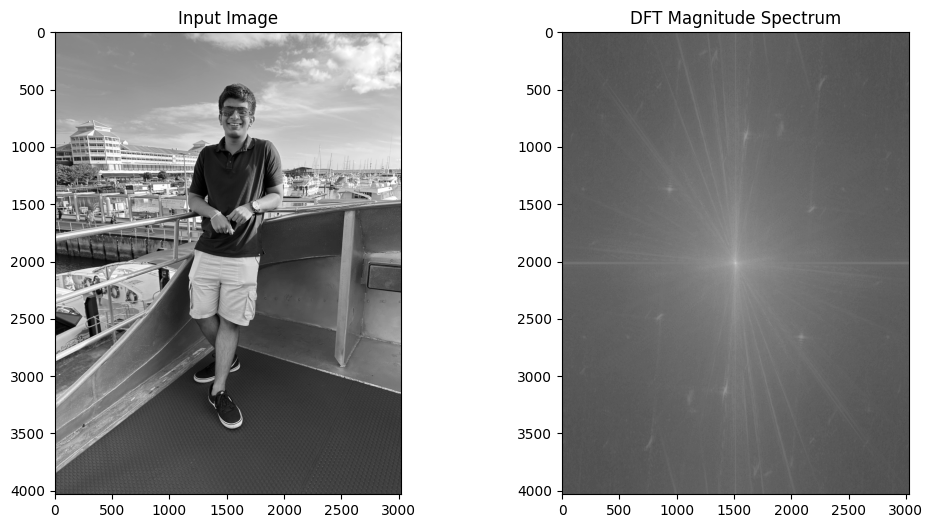

In [2]:
# Step 1: Read the input image
input_image = cv2.imread('IMG_2458_grey.jpg', cv2.COLOR_BGR2GRAY)

# Step 2: Apply DFT Transform to the image
dft = cv2.dft(np.float32(input_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Step 3: Plot the response of DFT Transform
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')

# Step 4: Apply the inverse DFT Transform to the output of Step 2
idft = cv2.idft(dft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
output_image = cv2.magnitude(idft[:, :, 0], idft[:, :, 1])

# Step 5: Compare the two images - Input of Step 1 and Output of Step 4
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(output_image, cmap='gray')
plt.title('Reconstructed Image (Inverse DFT)')

plt.show()

# Optional: You can also save the output image to a file
cv2.imwrite('output_image.jpg', output_image)

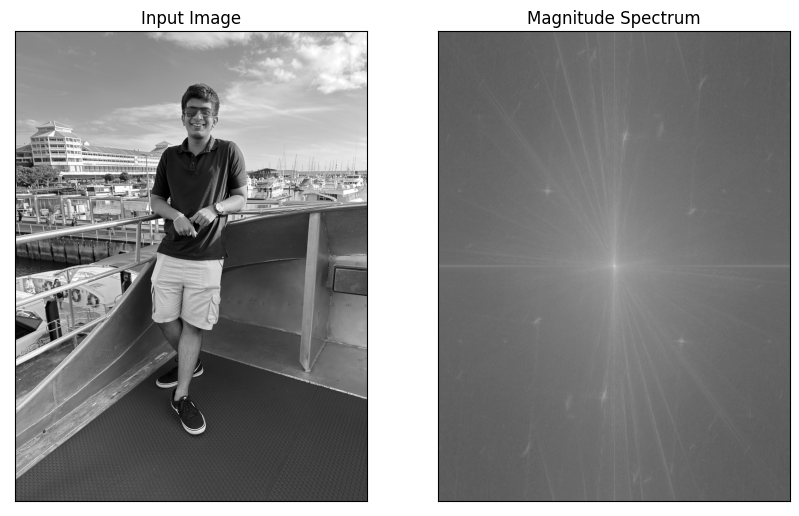

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
# now we will be loading the image and converting it to grayscale
image = cv2.imread("IMG_2458.jpg", cv2.IMREAD_GRAYSCALE)
 
 
# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
 
# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)
 
# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
 
# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

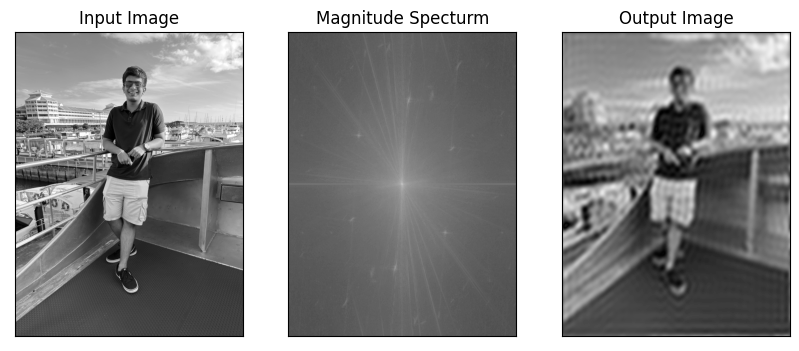

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
# read the input image
# you can specify the path to image
image = cv2.imread("IMG_2458.jpg", cv2.IMREAD_GRAYSCALE)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# calculating the discrete Fourier transform
DFT = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
 
# reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
row, col = image.shape
center_row, center_col = row // 2, col // 2
 
# create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1
 
# put the mask and inverse DFT in place.
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)
 
# calculate the magnitude of the inverse DFT
imageThen = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])
 
# visualize the original image and the magnitude spectrum
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Specturm'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(imageThen, cmap='gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()